The below [autoreload](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) extension ensures that if any locally imported python files change, the modules defined there are reloaded

In [1]:
%load_ext autoreload
%autoreload 2

The below imports [`here`](https://pypi.org/project/pyprojroot/), which allows one to refer to the root directory of the project in a consistent manner across execution environments. It then adds `here()` (the root directory) to the system path to ensure that we can load python modules defined in the project.

In [2]:
from hereutil import here, add_to_sys_path
add_to_sys_path(here())

Having ensured that the root path of the project is in the system path, we can load common basis functions from [src/common_basis.py](/src/common_basis.py). The template assumes that functions useful for most work be defined in `common_basis.py`, whereas code useful for individual analyses is defined where needed.

Here, we load the three datasets from parquet files using `load_abortion_parquet()`, `load_lynching_parquet()` and `load_incel_parquet()`. Each dataset is loaded as a dataclass with Pandas dataframes as its named attributes. Due to their total size of 4.6 gigabytes, the parquet files are not distributed in Git. Instead to download them from https://a3s.fi/dhh23-disc-parquet/, you can run `fetch-parquets.sh` within the `data/input/parquet` directory. Otherwise, the following code will certainly fail.

In [99]:
from src.common_basis import *

In [100]:
a = load_abortion_parquet()
a

AbortionData(abortion_conversations, abortion_tweets, abortion_tweet_hashtags, abortion_tweet_urls, abortion_tweet_mentions, abortion_matching_tweet_ids)

In [4]:
a.abortion_tweets

,ur_conversation_id,conversation_id,tweet_id,author_id,created_at,retweet_count,reply_count,like_count,quote_count,lang,...,mentions,date_created_at,year_created_at,quarter_created_at,month_created_at,day_created_at,week_created_at,hour_created_at,weekday_created_at,text_hash
0,1631406654469070849,1631406654469070849,1631543523164975106,1465434121887436807,2023-03-03 06:34:02,0,0,0,0,en,...,2,2023-03-03,2023,1,3,3,9,6,4,b'\x1d\xe67\xa5\xb2\x9df+\xd2o\xf1\x1f(M-\xf3\...
1,1631069907700908034,1631540131273363456,1631540131273363456,1216256394,2023-03-03 06:20:05,9,0,0,0,en,...,1,2023-03-03,2023,1,3,3,9,6,4,b'\xa3\x01\x84W\x0c\\\xe0\xc8\xf9Bv\xb8\x8c\t\...
2,1631069907700908034,1631540111526723584,1631540111526723584,1216256394,2023-03-03 06:20:04,6,0,0,0,en,...,1,2023-03-03,2023,1,3,3,9,6,4,b'\xed\xa7\xf3\x9c\xcdT\x0fB\xc65\x95\x14jI~R\...
3,1631369152781860864,1631540073526067201,1631540073526067201,1169711473586819072,2023-03-03 06:20:04,33,0,0,0,en,...,1,2023-03-03,2023,1,3,3,9,6,4,b'\xe5\xc6\xb7\x86\xf5S\x92a\x96{\x91\x95\xe7E...
4,1631069907700908034,1631540068698693633,1631540068698693633,1216256394,2023-03-03 06:20:03,37,0,0,0,en,...,1,2023-03-03,2023,1,3,3,9,6,4,b'\xa4\xea\xd9jY\xc7\xcfN\xac7\xaa\x8f\xfe\xae...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17884370,936894265258471424,936894265258471424,936954487452897281,460181386,2017-12-02 13:45:03,0,2,0,0,fr,...,3,2017-12-02,2017,4,12,2,48,13,5,b'\xe7\x99\xd3\xa0\x1e\x862\x0e\xf2\xb8T\xc2\x...
17884371,940706092753006603,940706092753006603,940721587657039873,772927160990433280,2017-12-12 23:14:03,0,1,0,0,fr,...,2,2017-12-12,2017,4,12,12,50,23,1,b'\xe6H\xa5\xa7#\xb7+\x12\xcf\xdb4\xc7\xd9[\xb...
17884372,989968059564679168,989968059564679168,989968604736118784,46822887,2018-04-27 20:44:04,667,162,863,299,en,...,0,2018-04-27,2018,2,4,27,17,20,4,"b'C\x9f\xb8<*\xce\xf7\xc5\x90""\xda%}-\xc1\xbd\..."
17884373,936856405738270722,936856405738270722,936857725480222720,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


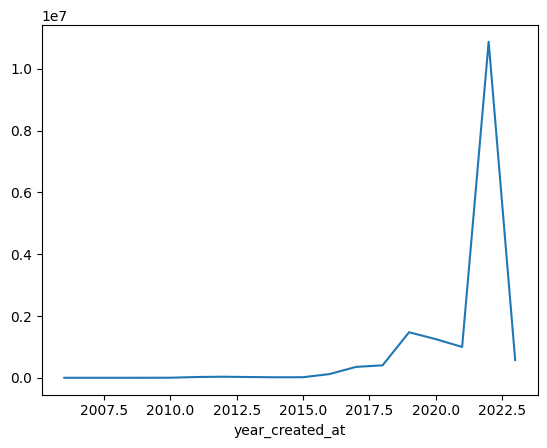

In [5]:
import matplotlib.pyplot as plt
s = a.abortion_tweets.groupby('year_created_at').size()
s.plot(x=s.index,y=s.values)
plt.show()


In [97]:
df2 = df.drop(columns='text')[(df['created_at']>=datetime.datetime(2023,3,3)) & (df['created_at']<=datetime.datetime(2023,3,4))]
df2 = df['text'][(df['created_at']>=datetime.datetime(2023,3,3)) & (df['created_at']<=datetime.datetime(2023,3,4))]

0           @realjorgemendoz @JesseKellyDC If a woman is p...
1           RT @RewireNewsGroup: 5/ And just in case the f...
2           RT @RewireNewsGroup: 4/ The fetal “personhood”...
3           RT @Taniel: "a national anti-abortion group is...
4           RT @RewireNewsGroup: 1/ 🚨Today, the Wyoming st...
                                  ...                        
17831904    I know I’ll never get an apology for that time...
17874140    @TardigradeJr @johnthomas1536 @musicandscifi @...
17884076    I’m curious. Exactly how much state tax dollar...
17884077    @Flora34921110 You don't need to scuff a comic...
17884150    They scuffed a book. 
No offence has been comm...
Name: text, Length: 1865, dtype: string[pyarrow]

In [92]:
df2


,ur_conversation_id,conversation_id,tweet_id,author_id,created_at,retweet_count,reply_count,like_count,quote_count,lang,...,date_created_at,year_created_at,quarter_created_at,month_created_at,day_created_at,week_created_at,hour_created_at,weekday_created_at,text_hash,text
0,1631406654469070849,1631406654469070849,1631543523164975106,1465434121887436807,2023-03-03 06:34:02,0,0,0,0,en,...,2023-03-03,2023,1,3,3,9,6,4,b'\x1d\xe67\xa5\xb2\x9df+\xd2o\xf1\x1f(M-\xf3\...,@realjorgemendoz @JesseKellyDC If a woman is p...
1,1631069907700908034,1631540131273363456,1631540131273363456,1216256394,2023-03-03 06:20:05,9,0,0,0,en,...,2023-03-03,2023,1,3,3,9,6,4,b'\xa3\x01\x84W\x0c\\\xe0\xc8\xf9Bv\xb8\x8c\t\...,RT @RewireNewsGroup: 5/ And just in case the f...
2,1631069907700908034,1631540111526723584,1631540111526723584,1216256394,2023-03-03 06:20:04,6,0,0,0,en,...,2023-03-03,2023,1,3,3,9,6,4,b'\xed\xa7\xf3\x9c\xcdT\x0fB\xc65\x95\x14jI~R\...,RT @RewireNewsGroup: 4/ The fetal “personhood”...
3,1631369152781860864,1631540073526067201,1631540073526067201,1169711473586819072,2023-03-03 06:20:04,33,0,0,0,en,...,2023-03-03,2023,1,3,3,9,6,4,b'\xe5\xc6\xb7\x86\xf5S\x92a\x96{\x91\x95\xe7E...,"RT @Taniel: ""a national anti-abortion group is..."
4,1631069907700908034,1631540068698693633,1631540068698693633,1216256394,2023-03-03 06:20:03,37,0,0,0,en,...,2023-03-03,2023,1,3,3,9,6,4,b'\xa4\xea\xd9jY\xc7\xcfN\xac7\xaa\x8f\xfe\xae...,"RT @RewireNewsGroup: 1/ 🚨Today, the Wyoming st..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831904,1631706682597179405,1631706682597179405,1631708752737861665,138203134,2023-03-03 17:30:05,926,1139,15577,68,en,...,2023-03-03,2023,1,3,3,9,17,4,b'\xf9\xee[\xbb\x9e\xa2]\x1a)\x10\x95\x95)\xd0...,I know I’ll never get an apology for that time...
17874140,1631118565595070469,1631118565595070469,1631467132935446528,1610274421436026881,2023-03-03 01:30:05,0,1,0,0,en,...,2023-03-03,2023,1,3,3,9,1,4,"b'\x0f\xbc\xc6&\xc0,6\xb1\xeei\x84\x01\x12\x0f...",@TardigradeJr @johnthomas1536 @musicandscifi @...
17884076,1631443812966105088,1631482228441251840,1631482228441251840,23996352,2023-03-03 02:30:04,28,54,237,4,en,...,2023-03-03,2023,1,3,3,9,2,4,b'\xeed\x85\xca\x13\xa1^w\x07\xe2S\xda\xaco2\x...,I’m curious. Exactly how much state tax dollar...
17884077,1631727745649582086,1631727745649582086,1631729339845812238,1601127849565601793,2023-03-03 18:52:04,0,1,3,0,en,...,2023-03-03,2023,1,3,3,9,18,4,b'\x97\x0eZ\xd1\xb0Su\x8b\x95\xcd\x8ei\xa26\x9...,@Flora34921110 You don't need to scuff a comic...


In [6]:
l = load_lynching_parquet()
l

LynchingData(lynching_conversations, lynching_tweets, lynching_tweet_hashtags, lynching_tweet_urls, lynching_tweet_mentions, lynching_matching_tweet_ids)

In [102]:
i = load_incel_parquet()
i

IncelData(incel_threads, incel_posts, incel_users, incel_quotes)

# How to get around the [pyarrow bug](https://github.com/apache/arrow/issues/33049)

In [0]:
import datetime
df = i.incel_posts

In [106]:
# this does not work
df[(df['time_posted']>=datetime.datetime(2023,3,3)) & (df['time_posted']<=datetime.datetime(2023,3,4))]

ArrowInvalid: offset overflow while concatenating arrays

In [109]:
# this works (we subset first without the large text column, then subset only the text column and then reconstruct the combined dataset)
df2 = df.drop(columns='post_html')[(df['time_posted']>=datetime.datetime(2023,3,3)) & (df['time_posted']<=datetime.datetime(2023,3,4))]
df2['post_html'] = df['post_html'][(df['time_posted']>=datetime.datetime(2023,3,3)) & (df['time_posted']<=datetime.datetime(2023,3,4))]
df2

,post_id,post_id_str,poster_id,time_posted,post_content,thread_id,post_order_in_thread,post_html
293,464,post-10742266,175,2023-03-03 03:15:03,I only relate with the second poem.,24,4,"<div class=""message-content js-messageContent""..."
294,466,post-10742767,176,2023-03-03 04:16:19,Thanks for broadening my lexicon again,24,6,"<div class=""message-content js-messageContent""..."
295,468,post-10745614,152,2023-03-03 15:30:14,"Unspoken, not spoken.",24,8,"<div class=""message-content js-messageContent""..."
617,461,post-10742195,152,2023-03-03 03:07:40,Unnamed​ Delusion befuddles the souls who se...,24,1,"<div class=""message-content js-messageContent""..."
618,462,post-10742238,153,2023-03-03 03:11:59,second one sounds more poetic,24,2,"<div class=""message-content js-messageContent""..."
...,...,...,...,...,...,...,...,...
2259379,2255018,post-10741296,3692,2023-03-03 00:31:02,thespanishcel said: Quora is basically: -...,132161,26,"<div class=""message-content js-messageContent""..."
2259380,2255019,post-10743159,846,2023-03-03 05:17:08,thespanishcel said: It was much better th...,132161,27,"<div class=""message-content js-messageContent""..."
2259381,2255022,post-10743531,1,2023-03-03 06:27:49,thespanishcel said: It was much better th...,132161,30,"<div class=""message-content js-messageContent""..."
2260226,2256583,post-10748031,3217,2023-03-03 22:22:39,What are your favorite quotes by famous philos...,132240,1,"<div class=""message-content js-messageContent""..."


In [110]:
# alternate fix is to load the data with another pandas backend. This is more memory-hungry however and the initial load is slower as well.
df = load_incel_parquet(dtype_backend='numpy_nullable').incel_posts
df[(df['time_posted']>=datetime.datetime(2023,3,3)) & (df['time_posted']<=datetime.datetime(2023,3,4))]

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread
293,464,post-10742266,175,2023-03-03 03:15:03,I only relate with the second poem.,"<div class=""message-content js-messageContent""...",24,4
294,466,post-10742767,176,2023-03-03 04:16:19,Thanks for broadening my lexicon again,"<div class=""message-content js-messageContent""...",24,6
295,468,post-10745614,152,2023-03-03 15:30:14,"Unspoken, not spoken.","<div class=""message-content js-messageContent""...",24,8
617,461,post-10742195,152,2023-03-03 03:07:40,Unnamed​ Delusion befuddles the souls who se...,"<div class=""message-content js-messageContent""...",24,1
618,462,post-10742238,153,2023-03-03 03:11:59,second one sounds more poetic,"<div class=""message-content js-messageContent""...",24,2
...,...,...,...,...,...,...,...,...
2259379,2255018,post-10741296,3692,2023-03-03 00:31:02,thespanishcel said: Quora is basically: -...,"<div class=""message-content js-messageContent""...",132161,26
2259380,2255019,post-10743159,846,2023-03-03 05:17:08,thespanishcel said: It was much better th...,"<div class=""message-content js-messageContent""...",132161,27
2259381,2255022,post-10743531,1,2023-03-03 06:27:49,thespanishcel said: It was much better th...,"<div class=""message-content js-messageContent""...",132161,30
2260226,2256583,post-10748031,3217,2023-03-03 22:22:39,What are your favorite quotes by famous philos...,"<div class=""message-content js-messageContent""...",132240,1
